In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df['FastingBS'] = df['FastingBS'].astype('object')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'MaxHR'}>],
       [<Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

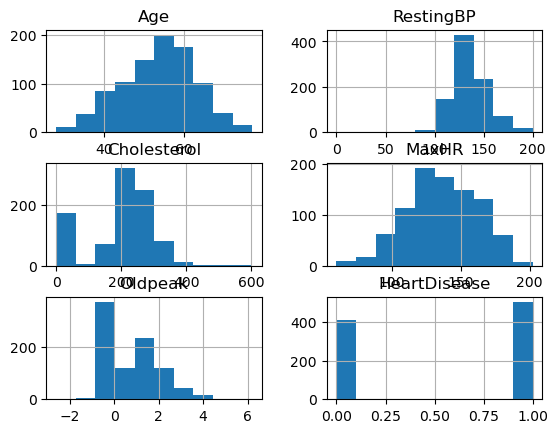

In [6]:
df.hist()

In [7]:
df.loc[df.Cholesterol == 0, 'Cholesterol'] = pd.NA

In [8]:
df.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [10]:
df['Cholesterol'] = df['Cholesterol'].fillna(value=np.nanmedian(df['Cholesterol']))

In [11]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
X = df.drop('HeartDisease', axis=1)
y= df['HeartDisease']

In [13]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [14]:
corr_df = df.corr()

C:\Users\Szymon\AppData\Local\Temp\ipykernel_2460\1779705247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


<Axes: >

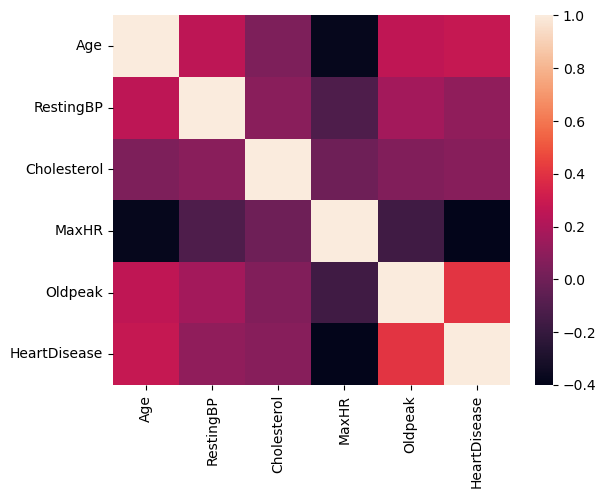

In [15]:
sns.heatmap(corr_df)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [17]:
y_train.value_counts(normalize=True)

1    0.55296
0    0.44704
Name: HeartDisease, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

1    0.554348
0    0.445652
Name: HeartDisease, dtype: float64

In [19]:
X_train['Sex'].value_counts(normalize=True)

M    0.783489
F    0.216511
Name: Sex, dtype: float64

In [20]:
X_test['Sex'].value_counts(normalize=True)

M    0.804348
F    0.195652
Name: Sex, dtype: float64

In [21]:
from sklearn.compose import ColumnTransformer

In [22]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [23]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
902,58,M,ATA,125,220.0,0,Normal,144,N,0.4,Flat
627,44,M,NAP,140,235.0,0,LVH,180,N,0.0,Up
592,61,M,ASY,190,287.0,1,LVH,150,Y,2.0,Down
411,54,M,ASY,180,237.0,1,Normal,150,N,1.5,Flat
104,46,M,ASY,118,186.0,0,Normal,124,N,0.0,Flat


In [24]:
num_cols = X_train.select_dtypes(['int64','float']).columns
numeric_pipeline = Pipeline([('scaler', StandardScaler())])

In [25]:
cat_cols = X_train.select_dtypes(['object']).columns
cat_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [26]:
cat_cols = cat_cols[[0,1 ,3,4,5]]

In [27]:
transformer = ColumnTransformer([('numeric_transform', numeric_pipeline, num_cols),
                                 ('cat_transform', cat_pipeline, cat_cols)])

In [28]:
X_train_scaled = transformer.fit_transform(X_train)

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
X_train_scaled.shape

(642, 19)

In [31]:
y_train.shape

(642,)

In [32]:
def model_report(model, index,y=y_train,X=X_train_scaled):
    accuracy_score = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    precision_score = cross_val_score(model, X, y, cv=10, scoring='precision')
    recall_score = cross_val_score(model, X, y, cv=10, scoring='recall')
    roc_auc_score = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    return pd.DataFrame({'accuracy' : np.mean(accuracy_score), "precision" : np.mean(precision_score), 'recall' : np.mean(recall_score), "roc_auc" : np.mean(roc_auc_score)}, index=[index])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression()
log_reg_score = model_report(log_reg, 'LogisticRegression')

In [35]:
log_reg_score

,accuracy,precision,recall,roc_auc
LogisticRegression,0.85351,0.858255,0.881508,0.919143


In [36]:
from sklearn.linear_model import RidgeClassifier

In [37]:
ridge = RidgeClassifier()
ridge_score = model_report(ridge, 'Ridge')
ridge_score

,accuracy,precision,recall,roc_auc
Ridge,0.852019,0.857057,0.881429,0.91987


In [39]:
from sklearn.svm import LinearSVC

In [40]:
linear_svc = LinearSVC()
linear_svc_score = model_report(linear_svc, "Linear_SVC")
linear_svc_score

c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarni

,accuracy,precision,recall,roc_auc
Linear_SVC,0.84887,0.856455,0.875873,0.918252


In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC()
svc_score = model_report(svc, 'SVC')
svc_score

,accuracy,precision,recall,roc_auc
SVC,0.862909,0.855382,0.906825,0.920805


In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
guassian_nb = GaussianNB()
gaussian_nb_score = model_report(guassian_nb, "GaussianNB")
gaussian_nb_score

,accuracy,precision,recall,roc_auc
GaussianNB,0.848918,0.872467,0.853492,0.907762


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree= DecisionTreeClassifier()
tree_score = model_report(tree, "DecisionTree")
tree_score

,accuracy,precision,recall,roc_auc
DecisionTree,0.799087,0.831044,0.791508,0.798574


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
KNN = KNeighborsClassifier()
knn_score = model_report(KNN, "KNN")
knn_score

,accuracy,precision,recall,roc_auc
KNN,0.861322,0.859843,0.895794,0.901695


In [49]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [50]:
forest = RandomForestClassifier()
forest_score = model_report(forest, 'RandomForest')
forest_score

,accuracy,precision,recall,roc_auc
RandomForest,0.867596,0.862649,0.906825,0.924747


In [51]:
ada = AdaBoostClassifier()
ada_score = model_report(ada, 'AdaBoost')
ada_score

,accuracy,precision,recall,roc_auc
AdaBoost,0.838005,0.853887,0.856349,0.893042


In [52]:
gradient = GradientBoostingClassifier()
gradient_score = model_report(gradient, 'GradientBoost')
gradient_score

,accuracy,precision,recall,roc_auc
GradientBoost,0.861298,0.871498,0.892857,0.925744


In [53]:
model_results = pd.concat([log_reg_score, ridge_score, linear_svc_score, svc_score, gaussian_nb_score, tree_score, knn_score, forest_score, ada_score, gradient_score])
model_results.sort_values('roc_auc', ascending=False)

,accuracy,precision,recall,roc_auc
GradientBoost,0.861298,0.871498,0.892857,0.925744
RandomForest,0.867596,0.862649,0.906825,0.924747
SVC,0.862909,0.855382,0.906825,0.920805
Ridge,0.852019,0.857057,0.881429,0.919870
LogisticRegression,0.853510,0.858255,0.881508,0.919143
Linear_SVC,0.848870,0.856455,0.875873,0.918252
GaussianNB,0.848918,0.872467,0.853492,0.907762
KNN,0.861322,0.859843,0.895794,0.901695
AdaBoost,0.838005,0.853887,0.856349,0.893042
DecisionTree,0.799087,0.831044,0.791508,0.798574


In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [55]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
params = {
    'n_estimators' : np.arange(100, 500, 1),
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : np.arange(1,20,1),
    'min_samples_split' : np.arange(1, 30, 1),
    'min_samples_leaf' : np.arange(1, 50, 1),
    'bootstrap' : [True, False]
    
}

In [57]:
forest = RandomForestClassifier()

In [58]:
random_search = RandomizedSearchCV(forest, param_distributions=params, cv=10, scoring='accuracy', return_train_score=True, verbose=False)
random_search.fit(X_train_scaled, y_train)

c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 4...
       425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437,
       438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450,
       451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463,
       464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499])},
                   return_train_score=True, scoring='accuracy', verbose=False)

In [59]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=18, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=287)


In [60]:
print(random_search.best_score_)

0.867596153846154


In [61]:
forest = RandomForestClassifier()

In [62]:
random_search = RandomizedSearchCV(forest, param_distributions=params, cv=10, scoring='roc_auc', return_train_score=True, verbose=False)
random_search.fit(X_train_scaled, y_train)

c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 4...
       425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437,
       438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450,
       451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463,
       464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499])},
                   return_train_score=True, scoring='roc_auc', verbose=False)

In [63]:
print(random_search.best_estimator_)
print(random_search.best_score_)

RandomForestClassifier(bootstrap=False, max_depth=16, min_samples_leaf=24,
                       min_samples_split=24, n_estimators=426)
0.9259222769567597


In [64]:
final_model = random_search.best_estimator_

In [65]:
params= {
    'learning_rate' : np.arange(0.0, 0.5, 0.01),
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : np.arange(1, 20, 1),
    'min_samples_split' : np.arange(1, 30, 1),
    'loss' : ['log_loss', 'exponential'],
    'n_estimators' : np.arange(100, 300, 1)
}

In [66]:
gradient = GradientBoostingClassifier()

In [67]:
random_search = RandomizedSearchCV(gradient, param_distributions=params, cv=10, scoring = 'roc_auc', return_train_score=True, verbose = False)
random_search.fit(X_train_scaled, y_train)

c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "c:\Users\Szymon\anaconda3\envs\ML\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.4...
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
       282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299])},
                   return_train_score=True, scoring='roc_auc', verbose=False)

In [68]:
random_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.19, max_depth=12,
                           max_features='log2', min_samples_split=5,
                           n_estimators=127)

In [69]:
random_search.best_score_

0.9244540229885058

In [72]:
final_model = random_search.best_estimator_


In [70]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [71]:

import pickle 

In [381]:
with open('GradientBoostModel.pkl', 'wb') as f:
    pickle.dump(final_model, f)

In [73]:
final_model.feature_importances_

array([0.06858389, 0.06773891, 0.09643557, 0.08167541, 0.11194258,
       0.0242145 , 0.01923471, 0.07300976, 0.01182575, 0.00708738,
       0.01001112, 0.00698055, 0.00855529, 0.00798426, 0.0276213 ,
       0.02486545, 0.0042459 , 0.16864015, 0.17934753])

In [412]:
import xgboost as xgb

In [413]:
xgbclf = xgb.XGBClassifier(objective="multi:softmax")

In [429]:
params = {'max_depth': np.arange(1,30,1),
              'learning_rate': np.arange(0.0, 0.8, 0.01),
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': np.arange(100, 800, 5),
              'num_class': [10]
              }

In [430]:
xgb_random = RandomizedSearchCV(xgbclf, param_distributions=params, cv=10, scoring = 'accuracy', return_train_score=True, verbose = False)

In [431]:
xgb_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
       490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550,
       555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
       620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680,
       685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745,
       750, 755, 760, 765, 770, 775, 780, 785, 790, 795]),
                                        'num_class': [10],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True, scoring='accuracy', verbose=False)

In [432]:
xgb_random.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7999999999999999, colsample_bynode=None,
              colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=330, n_jobs=None, num_class=10,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [433]:
xgb_random.best_score_

0.8705769230769231

In [434]:
xgb_final = xgb_random.best_estimator_

In [435]:
y_pred = xgb_final.predict(X_test_scaled)

In [74]:
the_model = Pipeline([('transformer', transformer),
                      ('model', final_model)])

In [76]:
X_test_scaled = the_model[0].transform(X_test)
y_pred = the_model[1].predict(X_test_scaled)

In [77]:
accuracy_score(y_test, y_pred)

0.8659420289855072

In [78]:
roc_auc_score(y_test, y_pred)

0.862346564642117

In [75]:
with open('FullGradientBoost.pkl', 'wb') as f:
    pickle.dump(the_model, f)